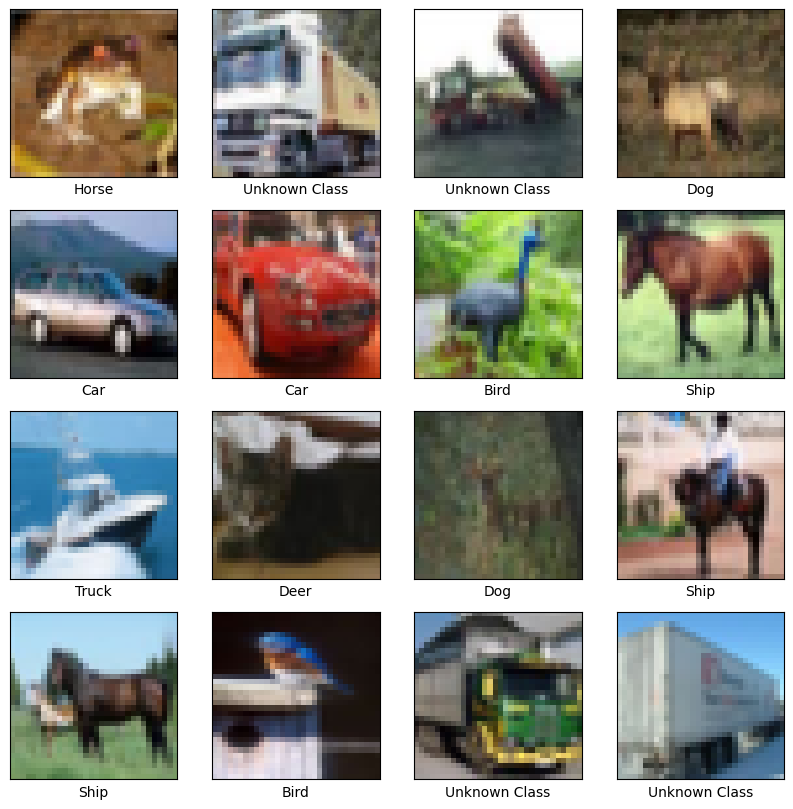

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()
training_images, testing_images = training_images / 255, testing_images / 255
class_names = ['Plane', 'Car', 'Bird', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    
    # Assurez-vous que l'indice d'étiquette est dans la plage des classes valides (0 à 9)
    label_index = int(training_labels[i][0])
    if 0 <= label_index < len(class_names):
        plt.xlabel(class_names[label_index])
    else:
        plt.xlabel('Unknown Class')  # Si l'indice n'est pas valide, affichez "Unknown Class"

plt.show()

In [2]:

training_images = training_images[:20000]
training_labels = training_images[:20000]
testing_images = training_images[:40000]
testing_labels = training_images[:40000]

In [4]:

# Création d'un modèle séquentiel
model = models.Sequential()

# Ajout d'une couche de convolution 2D avec 32 filtres, une taille de noyau de (3,3),
# une fonction d'activation ReLU et une forme d'entrée de (32,32,3)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Ajout d'une couche de max-pooling 2D avec une taille de pool de (2,2)
model.add(layers.MaxPooling2D((2, 2)))

# Ajout d'une autre couche de convolution 2D avec 64 filtres, une taille de noyau de (3,3)
# et une fonction d'activation ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Ajout d'une autre couche de max-pooling 2D avec une taille de pool de (2,2)
model.add(layers.MaxPooling2D((2, 2)))

# Ajout d'une autre couche de convolution 2D avec 64 filtres, une taille de noyau de (3,3)
# et une fonction d'activation ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Redimensionnement des données en un vecteur pour l'entrée dans les couches denses
model.add(layers.Flatten())

# Ajout d'une couche dense avec 64 neurones et une fonction d'activation ReLU
model.add(layers.Dense(64, activation='relu'))

# Ajout d'une couche dense de sortie avec 10 neurones (pour les 10 classes) 
# et une fonction d'activation softmax pour la classification
model.add(layers.Dense(10, activation='softmax'))



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

# Charger les données CIFAR-10
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()
training_images, testing_images = training_images / 255.0, testing_images / 255.0

# Construire le modèle
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))


Epoch 1/10
1563/1563 [==============================] - 88s 39ms/step - loss: 1.5144 - accuracy: 0.4462 - val_loss: 1.3102 - val_accuracy: 0.5332
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1659 - accuracy: 0.5867 - val_loss: 1.1057 - val_accuracy: 0.6081
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0022 - accuracy: 0.6450 - val_loss: 0.9806 - val_accuracy: 0.6572
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9026 - accuracy: 0.6816 - val_loss: 0.9276 - val_accuracy: 0.6777
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8388 - accuracy: 0.7068 - val_loss: 0.9058 - val_accuracy: 0.6898
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7808 - accuracy: 0.7265 - val_loss: 0.8996 - val_accuracy: 0.6901
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7328 - accuracy: 0.7418 - val_loss: 0.8521 -

In [7]:
loss, accuracy = model.evaluate(testing_images, testing_labels)

# Affichage de la perte (loss) et de la précision (accuracy)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Sauvegarde du modèle
model.save('image.model')


313/313 [==============================] - 4s 12ms/step - loss: 0.8373 - accuracy: 0.7170
Loss: 0.8373078107833862
Accuracy: 0.7170000076293945
INFO:tensorflow:Assets written to: image.model\assets


INFO:tensorflow:Assets written to: image.model\assets


In [13]:
model = models.load_model('image.model')

1/1 [==============================] - 0s 31ms/step
La prédiction est : Car


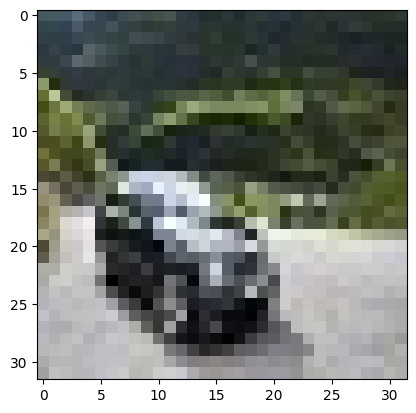

In [35]:
import cv2 as cv
img = cv.imread('image.model/assets/car.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap=plt.cm.binary)
prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'La prédiction est : {class_names[index]}')
